# Introduction to NLP Fundamentals in Tensorflow

---
### Typical architecture:

<table style="font-size: 17px;">
  <tr>
    <th style="text-align: center;">Hyperparameter/Layer type</th>
    <th style="text-align: center;">What does it do?</th> 
    <th style="text-align: center;">Typical values</th>
  </tr>
  <tr>
    <td style="text-align: left;">Input text(s)</td>
    <td style="text-align: left;">Target texts/sequences you'd like to discover patterns in</td> 
    <td style="text-align: left;">Whatever you can represent as text or sequence</td>
  </tr>
  <tr>
    <td style="text-align: left;">Input layer</td>
    <td style="text-align: left;">Takes in target sequence</td> 
    <td style="text-align: left; font-family: 'Courier New', Courier, monospace; font-size: 14px;">input_shape = [batch_size, embedding_size] or [batch_size, sequence_shape]</td>
  </tr>
  <tr>
    <td style="text-align: left;">Text vectorization layer</td>
    <td style="text-align: left;">Maps input sequences to numbers</td> 
    <td style="text-align: left;">Multiple, can create with <span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.TextVectorization</span></td>
  </tr>
  <tr>
    <td style="text-align: left;">Embedding</td>
    <td style="text-align: left;">Turns mapping of text vectors to embedding matrix</td> 
<td style="text-align: left;">Multiple, can create with <span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.Embedding</span></td> 
  </tr>
  <tr>
    <td style="text-align: left;">RNN cells(s)</td>
    <td style="text-align: left;">Find patterns in sequences</td>
    <td style="text-align: left;"><span style="font-size: 14px; color: blue; text-decoration: underline;">SimpleRNN, LSTM, GRU</span></td>
  </tr>
  <tr>
    <td style="text-align: left;">Hidden activation</td>
    <td style="text-align: left;">Adds non-linearity to learned features</td>
    <td style="text-align: left; font-size: 14px;">Usually Tanh hyperbolic tangent) (<span style="color: blue; text-decoration: underline;">tf.keras.activations.tanh</span>)</td>
  </tr>
  <tr>
    <td style="text-align: left;">Pooling layer</td>
    <td style="text-align: left;">Reduces the dimensionality of learned sequences features (usually for Conv1D models)</td>
    <td style="text-align: left;">Average (<span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.GlobalAveragePooling1D</span>) or Max (<span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.GlobalMaxPool1D</span>)</td>
  </tr>
  <tr>
    <td style="text-align: left;">Fully connected layer</td>
    <td style="text-align: left;">Further refines learned features from recurrent layers</td>
    <td style="text-align: left;"><span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.Dense</span></td>
  </tr>
  <tr>
    <td style="text-align: left;">Output layer</td>
    <td style="text-align: left;">Takes learned features and outputs them in shape of taget labels</td>
    <td style="text-align: left;font-size: 14px;"><span style="font-family: 'Courier New', Courier, monospace; font-size: 14px;">output_shape = [number_of_classes]</span> (e.g. 2 for Diaster or Not Diaster)</td>
  </tr>
  <tr>
    <td style="text-align: left;">Output activation</td>
    <td style="text-align: left;">Adds non-linearities to output layer</td>
    <td style="text-align: left;font-size: 14px;"><span style="color: blue; text-decoration: underline;">tf.keras.activations.sigmoid</span> (binary classification) or <span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.activations.softmax</span></td>
  </tr>
</table>

### Get helper functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-04-02 19:45:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 10246 (10K) [text/plain]
Grabando a: «helper_functions.py»

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    en 0s      

2024-04-02 19:45:52 (20.1 MB/s) - «helper_functions.py» guardado [10246/10246]



In [2]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys, make_confusion_matrix

----
## Get dataset

I'm gonna use the *'Keaggle's introduction to NLP'* dataset (tweets labelled as diaster or not diaster).

In [3]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-04-02 19:45:58--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolviendo storage.googleapis.com (storage.googleapis.com)... 172.217.172.123, 142.251.134.91, 216.58.202.123, ...
Conectando con storage.googleapis.com (storage.googleapis.com)[172.217.172.123]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 607343 (593K) [application/zip]
Grabando a: «nlp_getting_started.zip»

nlp_getting_started 100%[===================>] 593.11K  3.66MB/s    en 0.2s    

2024-04-02 19:45:58 (3.66 MB/s) - «nlp_getting_started.zip» guardado [607343/607343]



---
## Visualizing a text dataset 📊

In [4]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
# How many examples of each class?
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [7]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [8]:
# Let's visualize some random training examples
import random
def see_examples(count=3):
    random_index = random.randint(0, len(train_df)-count) # create random indexes not higher than the total number of samples
    for row in train_df_shuffled[["text", "target"]][random_index:random_index+count].itertuples():
      _, text, target = row
      print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
      print(f"Text:\n{text}\n")
      print("---\n")

In [9]:
see_examples(5)

Target: 0 (not real disaster)
Text:
Stu put beetroot in his cake and even lost to a mudslide

---

Target: 0 (not real disaster)
Text:
LIKE I SWEAR THE SECRET WE'LL UNCOVER IS THE OLD GODS IN A SLUMBER. I THINK THERES GONNA BE ANOTHER BLIGHT

---

Target: 1 (real disaster)
Text:
Refugee Connections Indiegogo campaign will be going live tomorrow! Support us and help launch the only online community for #refugees.

---

Target: 0 (not real disaster)
Text:
Last chance to work at the old FFA foodstand at the fairgrounds. We are finishing demolition at 9am.  Any help would be appreciated

---

Target: 1 (real disaster)
Text:
#forbes #europe China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/C0SlAbBP7j

---



---
## Split data into training and validation sets

In [10]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1) # dedicate 10% of samples to validation set

---
## Converting text into numbers 💬➡🔢

In NLP, there are two main concepts for turning text into numbers

* **Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
    1. ***Using word-level tokenization*** - Every word in a sequence considered a single token.
    2. ***Character-level tokenization*** - Every character in a sequence considered a single token.
    3. ***Sub-word tokenization*** - Every word could be considered multiple tokens (is in between word-level and character-level tokenization).
* **Embeddings** - An embedding is a representation of natural language which can be learned.The size of the feature vector is tuneable. There are two ways to use embeddings:
    1. ***Create your own embedding*** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
    2. ***Reuse a pre-learned embedding*** - Many pre-trained embeddings exist online, like [Word2vec embeddings](http://jalammar.github.io/illustrated-word2vec/) or [GloVe embeddings](https://nlp.stanford.edu/projects/glove/).

### Text vectorization (tokenization) 

Helpful preprocessing layer:
[tf.keras.layers.TextVetorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization)

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization variables
#text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
#                                    standardize="lower_and_strip_punctuation", # how to process text
#                                    split="whitespace", # how to split tokens
#                                    ngrams=None, # create groups of n-words?
#                                    output_mode="int", # how to map tokens to numbers
#                                    output_sequence_length=None) # how long should the output sequence of tokens be?
#                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [12]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

I will create a ```TextVectorization``` object using custom data

In [13]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [14]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [15]:
# Create sample sentence and tokenize it
sample_sentence = "There was a murder in my neighborhood!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  75,   23,    3,  355,    4,   13, 3596,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [16]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['panama', 'pams', 'pampalmater', 'palmoil', 'palmer']


### Embedding using an Embedding Layer

[tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

In [17]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

In [18]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
#NaturalDisasters As California fires rage the Forest Service sounds the alarm about rising wildfire costs: Û_...  http://t.co/TQwrW3jQWo      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04305072,  0.03310212, -0.02513799, ..., -0.04859347,
          0.03640994, -0.03146982],
        [-0.00110662, -0.0043732 , -0.01385624, ..., -0.00481842,
         -0.00453138,  0.04834802],
        [ 0.01791656, -0.01652529,  0.0200595 , ..., -0.02954532,
         -0.00238746,  0.02581393],
        ...,
        [ 0.00671012,  0.01723503, -0.0236294 , ..., -0.01419272,
         -0.02333797, -0.02946337],
        [ 0.04061146,  0.02528976,  0.00355679, ...,  0.00752089,
         -0.03076952,  0.02198321],
        [-0.02024057, -0.04491225, -0.00394956, ...,  0.04309588,
         -0.0407508 , -0.02667995]]], dtype=float32)>

---
## I will build the following models

<table style="font-size: 17px;">
  <tr>
    <th style="text-align: center;">Experiment number</th>
    <th style="text-align: center;">Model</th> 
  </tr>
  <tr>
    <td style="text-align: center;">0</td>
    <td style="text-align: center;">Naive bayes with TF-IDF encoder (baseline)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">1</td>
    <td style="text-align: center;">Feed-forward neural network (dense model)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">2</td>
    <td style="text-align: center;">LSTM (RNN)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">3</td>
    <td style="text-align: center;">GRU (RNN)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">4</td>
    <td style="text-align: center;">Bidirectional-LSTM (RNN)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">5</td>
    <td style="text-align: center;">1D Convolutional Neural Network</td>
  </tr>
  <tr>
    <td style="text-align: center;">6</td>
    <td style="text-align: center;">Tensorflow Hub pretrained Feature Extractor</td>
  </tr>
  <tr>
    <td style="text-align: center;">7</td>
    <td style="text-align: center;">Tensorflow Hub pretrained Feature Extractor (10% of data)</td>
  </tr>
</table>

### Model 0 (baseline)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("classifier", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [20]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 80.45%


In [21]:
sample_sentence = "Forest fire in Buenos Aires. Argentina"

custom_pred = model_0.predict([sample_sentence])
print(f"{sample_sentence}", "(real disaster)" if custom_pred > 0 else "(not real disaster)")

Forest fire in Buenos Aires. Argentina (real disaster)


Creating an **evaluation function** for the experiments using these methods:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix (optional)

In [22]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

def calculate_results(y_true, y_pred, cf_matrix=False):
    """
    Calculates model accuracy, precision, recall and f1 score and confusion matrix (optional) of a binary classification model.

    Args:
    -----
    y_true = true labels in the form of a 1D array
    y_pred = predicted labels in the form of a 1D array
    cf_matrix = False per default

    Returns a dictionary of accuracy, precision, recall, f1-score and print a cf matrix.
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred)
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    if(cf_matrix):
        make_confusion_matrix(y_true, y_pred, figsize=(4,4))
    return model_results

In [23]:
model_0_preds = model_0.predict(val_sentences)

{'accuracy': 0.8044619422572179,
 'precision': 0.810901354721964,
 'recall': 0.8044619422572179,
 'f1': 0.7979735326940023}

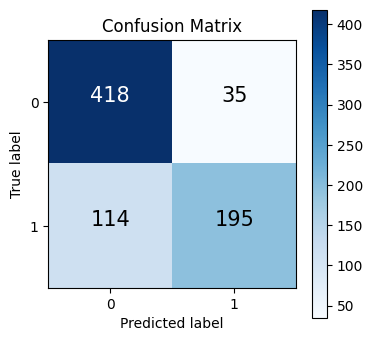

In [24]:
# Get baseline results
model_0_results = calculate_results(y_true=val_labels, 
                  y_pred=model_0_preds,
                  cf_matrix=True)
model_0_results

### Model 1: Simple dense model

In [25]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [26]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [27]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [28]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [29]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240402-194559
Epoch 1/5
215/215 [==============================] - 2s 6ms/step - loss: 0.6145 - accuracy: 0.6910 - val_loss: 0.5245 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.4428 - accuracy: 0.8152 - val_loss: 0.4556 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3484 - accuracy: 0.8568 - val_loss: 0.4412 - val_accuracy: 0.8189
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2855 - accuracy: 0.8885 - val_loss: 0.4479 - val_accuracy: 0.8202
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2382 - accuracy: 0.9095 - val_loss: 0.4664 - val_accuracy: 0.8097


In [30]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 580us/step - loss: 0.4664 - accuracy: 0.8097


[0.4663565754890442, 0.8097112774848938]

In [31]:
model_1_preds = model_1.predict(val_sentences)
model_1_preds.shape

24/24 [==============================] - 0s 555us/step


(762, 1)

In [32]:
print(f"model 1 preds:\n {model_1_preds[:5]}, {model_1_preds.shape}\n\nval labels:\n{val_labels[:5]}, {val_labels.shape}")

model 1 preds:
 [[0.91786134]
 [0.8872479 ]
 [0.28446525]
 [0.44955263]
 [0.0664197 ]], (762, 1)

val labels:
[1 1 0 0 0], (762,)


I need to reshape the model_1_preds to 1 dimension and turn the values to 0 or 1

In [33]:
model_1_preds = model_1_preds.flatten()
model_1_preds = [0 if value < 0.5 else 1 for value in model_1_preds]

{'accuracy': 0.8097112860892388,
 'precision': 0.8086263271006963,
 'recall': 0.8097112860892388,
 'f1': 0.8086476680826844}

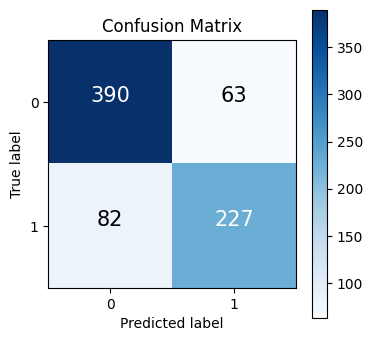

In [34]:
model_1_results = calculate_results(y_true=val_labels, 
                  y_pred=model_1_preds,
                  cf_matrix=True)
model_1_results

---
## Visualizing learned embeddings🔑

In [35]:
# Get the weight matrix of embedding layer 
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


We can use the **Embedding Projector tool** to visualize our embedding.

To use the Embedding Projector tool, we need two files:

* The embedding vectors (same as embedding weights).
* The meta data of the embedding vectors (the words they represent - our vocabulary).

To download them to file, I'm going to use the [code example available on the TensorFlow word embeddings tutorial page](https://www.tensorflow.org/text/guide/word_embeddings?hl=es-419#retrieve_the_trained_word_embeddings_and_save_them_to_disk).

In [36]:
import io 

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

Once you've downloaded the embedding vectors and metadata, you can visualize them using [Embedding Vector tool](http://projector.tensorflow.org/)

---
### Model 2: LSTM

In [37]:
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


> ⚠️**LSTM layer** expect an input 3D vector. Therefore, if I want to stack RNN cells, it is necessary to put ```return_sequences = True``` to get a 3D vector output (if ```return_sequences = False```, it will return a 2D vector)

In [38]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [39]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [40]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240402-194606
Epoch 1/5
215/215 [==============================] - 3s 11ms/step - loss: 0.5096 - accuracy: 0.7468 - val_loss: 0.4509 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3151 - accuracy: 0.8711 - val_loss: 0.4700 - val_accuracy: 0.7966
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2198 - accuracy: 0.9184 - val_loss: 0.5786 - val_accuracy: 0.7940
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1496 - accuracy: 0.9479 - val_loss: 0.6925 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1035 - accuracy: 0.9615 - val_loss: 1.1576 - val_accuracy: 0.7533


In [41]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

24/24 [==============================] - 0s 2ms/step


((762, 1),
 array([[9.9789202e-01],
        [9.9945825e-01],
        [8.5157531e-01],
        [1.1404559e-03],
        [4.0107689e-04],
        [1.2415016e-04],
        [1.4574649e-03],
        [3.9285683e-04],
        [2.4637584e-01],
        [2.5216868e-04]], dtype=float32))

In [42]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

{'accuracy': 0.7532808398950132,
 'precision': 0.7515466847424163,
 'recall': 0.7532808398950132,
 'f1': 0.7519831611957596}

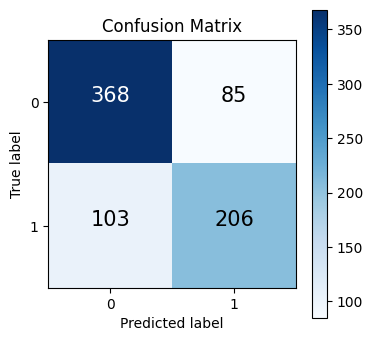

In [43]:
model_2_results = calculate_results(y_true=val_labels, 
                  y_pred=model_2_preds,
                  cf_matrix=True)
model_2_results

### Model 3: GRU

The GRU cell has similar features to an LSTM cell but has less parameters.

In [44]:
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [45]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [46]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [47]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240402-194620
Epoch 1/5
215/215 [==============================] - 3s 10ms/step - loss: 0.5201 - accuracy: 0.7405 - val_loss: 0.4627 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3169 - accuracy: 0.8660 - val_loss: 0.4797 - val_accuracy: 0.8005
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2201 - accuracy: 0.9137 - val_loss: 0.5969 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1630 - accuracy: 0.9396 - val_loss: 0.5618 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1240 - accuracy: 0.9590 - val_loss: 0.7318 - val_accuracy: 0.7769


In [48]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


((762, 1),
 array([[0.98188335],
        [0.9903541 ],
        [0.352631  ],
        [0.01429043],
        [0.00438124],
        [0.00137862],
        [0.03763941],
        [0.01100233],
        [0.93128246],
        [0.0029307 ]], dtype=float32))

In [49]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)>

{'accuracy': 0.7769028871391076,
 'precision': 0.7754941255427852,
 'recall': 0.7769028871391076,
 'f1': 0.7737111628847028}

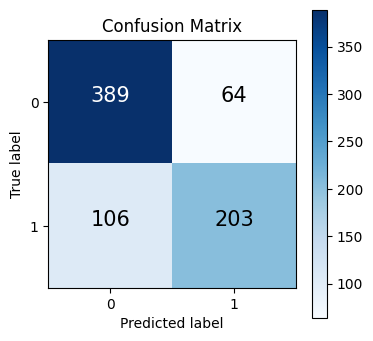

In [50]:
model_3_results = calculate_results(y_true=val_labels, 
                  y_pred=model_3_preds,
                  cf_matrix=True)
model_3_results

### Model 4: Bidirectional RNN model

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

*It's a good option for sequences which may benefit from passing forward and backwards*

In [51]:
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [52]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [53]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [54]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20240402-194632
Epoch 1/5
215/215 [==============================] - 5s 14ms/step - loss: 0.5173 - accuracy: 0.7446 - val_loss: 0.4575 - val_accuracy: 0.8071
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3190 - accuracy: 0.8691 - val_loss: 0.4839 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2129 - accuracy: 0.9194 - val_loss: 0.6239 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1464 - accuracy: 0.9479 - val_loss: 0.6961 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1134 - accuracy: 0.9600 - val_loss: 0.7265 - val_accuracy: 0.7743


In [55]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)>

{'accuracy': 0.7742782152230971,
 'precision': 0.7727922396987789,
 'recall': 0.7742782152230971,
 'f1': 0.7730909772642056}

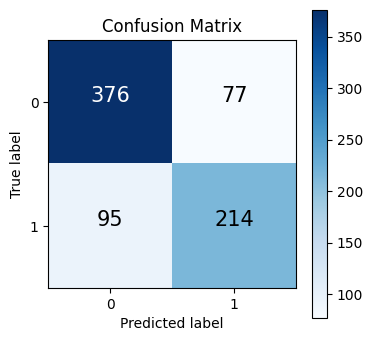

In [56]:
model_4_results = calculate_results(y_true=val_labels, 
                  y_pred=model_4_preds,
                  cf_matrix=True)
model_4_results

### Model 5: Conv1D

```
layers.Conv1D(filters=32,
              kernel_size=5,
              activation="relu",
              padding="same")   # Default is 'valid', the output is smaller than the input shape.
                                 'same' means output is same shape as input
                                 
```
---
```"VALID" = without padding"VALID" = without padding`:```
```
   inputs:         1  2  3  4  5  6  7  8  9  10 11 (12 13)
                  |________________|                dropped
                                 |_________________|
```
```"SAME" = with zero padding"SAME" = with zero padding`:```
```
               pad|                                      |pad
   inputs:      0 |1  2  3  4  5  6  7  8  9  10 11 12 13|0  0
               |________________|
                              |_________________|
                                             |________________|
```
---

In [57]:
from tensorflow.keras import layers

model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_4 (Dense)             (None, 1)              

In [58]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240402-194646
Epoch 1/5
215/215 [==============================] - 2s 5ms/step - loss: 0.5695 - accuracy: 0.7106 - val_loss: 0.4674 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3436 - accuracy: 0.8605 - val_loss: 0.4709 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2142 - accuracy: 0.9213 - val_loss: 0.5400 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.1368 - accuracy: 0.9561 - val_loss: 0.6108 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0964 - accuracy: 0.9695 - val_loss: 0.6848 - val_accuracy: 0.7690


In [59]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

24/24 [==============================] - 0s 752us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)>

{'accuracy': 0.7690288713910761,
 'precision': 0.7674808509596882,
 'recall': 0.7690288713910761,
 'f1': 0.767814023247094}

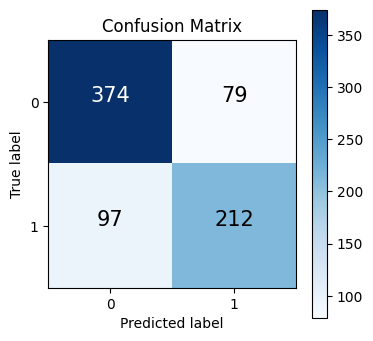

In [60]:
model_5_results = calculate_results(y_true=val_labels, 
                  y_pred=model_5_preds,
                  cf_matrix=True)
model_5_results

### Model 6: TensorFlow Hub pretrained sentence encoder

I'm will use the Universal [Sentence Encoder model](https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/tensorFlow2/variations/universal-sentence-encoder/versions/2?tfhub-redirect=true)

In [61]:
# Example use

import tensorflow_hub as hub

embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

tf.Tensor(
[[-0.03133015 -0.06338634 -0.016075   ... -0.03242781 -0.04575741
   0.05370457]
 [ 0.05080862 -0.01652432  0.0157378  ...  0.00976657  0.03170119
   0.01788119]], shape=(2, 512), dtype=float32)


---
![image](img.jpeg)

In [62]:
# Can be used this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE") 

In [63]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [64]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240402-194702
Epoch 1/5
215/215 [==============================] - 4s 7ms/step - loss: 0.5052 - accuracy: 0.7789 - val_loss: 0.4377 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.4158 - accuracy: 0.8161 - val_loss: 0.4235 - val_accuracy: 0.8215
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4021 - accuracy: 0.8234 - val_loss: 0.4196 - val_accuracy: 0.8268
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3939 - accuracy: 0.8246 - val_loss: 0.4252 - val_accuracy: 0.8228
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3872 - accuracy: 0.8289 - val_loss: 0.4171 - val_accuracy: 0.8360


In [65]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

24/24 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)>

{'accuracy': 0.8359580052493438,
 'precision': 0.835779786785911,
 'recall': 0.8359580052493438,
 'f1': 0.8342137068206852}

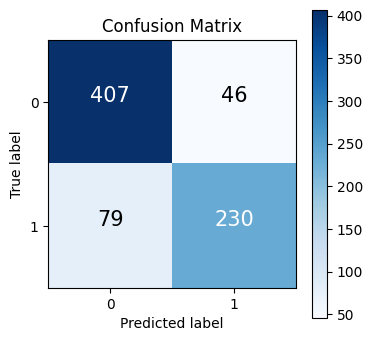

In [66]:
model_6_results = calculate_results(y_true=val_labels, 
                  y_pred=model_6_preds,
                  cf_matrix=True)
model_6_results

### Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

In [67]:
train_10_percent_split = int(0.1 * len(train_sentences))
train_10_percent_split

685

In [68]:
# Create subsets of 10% of the training data
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_sentences_10_percent), len(train_labels_10_percent)                                                   

(685, 685)

In [69]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [70]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20240402-194717
Epoch 1/5
22/22 [==============================] - 3s 19ms/step - loss: 0.6752 - accuracy: 0.6438 - val_loss: 0.6448 - val_accuracy: 0.7559
Epoch 2/5
22/22 [==============================] - 0s 8ms/step - loss: 0.6097 - accuracy: 0.7883 - val_loss: 0.5870 - val_accuracy: 0.7612
Epoch 3/5
22/22 [==============================] - 0s 6ms/step - loss: 0.5408 - accuracy: 0.8117 - val_loss: 0.5362 - val_accuracy: 0.7651
Epoch 4/5
22/22 [==============================] - 0s 6ms/step - loss: 0.4833 - accuracy: 0.8190 - val_loss: 0.4973 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 0s 6ms/step - loss: 0.4398 - accuracy: 0.8336 - val_loss: 0.4792 - val_accuracy: 0.7848


In [71]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)>

{'accuracy': 0.7847769028871391,
 'precision': 0.7847769028871391,
 'recall': 0.7847769028871391,
 'f1': 0.7847769028871391}

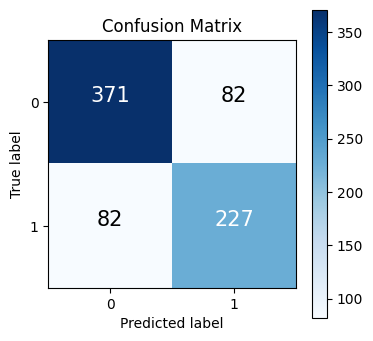

In [72]:
model_7_results = calculate_results(y_true=val_labels, 
                  y_pred=model_7_preds,
                  cf_matrix=True)
model_7_results

---
---
## Comparing the performance of each of our models

In [73]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": model_0_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,0.804462,0.810901,0.804462,0.797974
simple_dense,0.809711,0.808626,0.809711,0.808648
lstm,0.753281,0.751547,0.753281,0.751983
gru,0.776903,0.775494,0.776903,0.773711
bidirectional,0.774278,0.772792,0.774278,0.773091
conv1d,0.769029,0.767481,0.769029,0.767814
tf_hub_sentence_encoder,0.835958,0.835780,0.835958,0.834214
tf_hub_10_percent_data,0.784777,0.784777,0.784777,0.784777


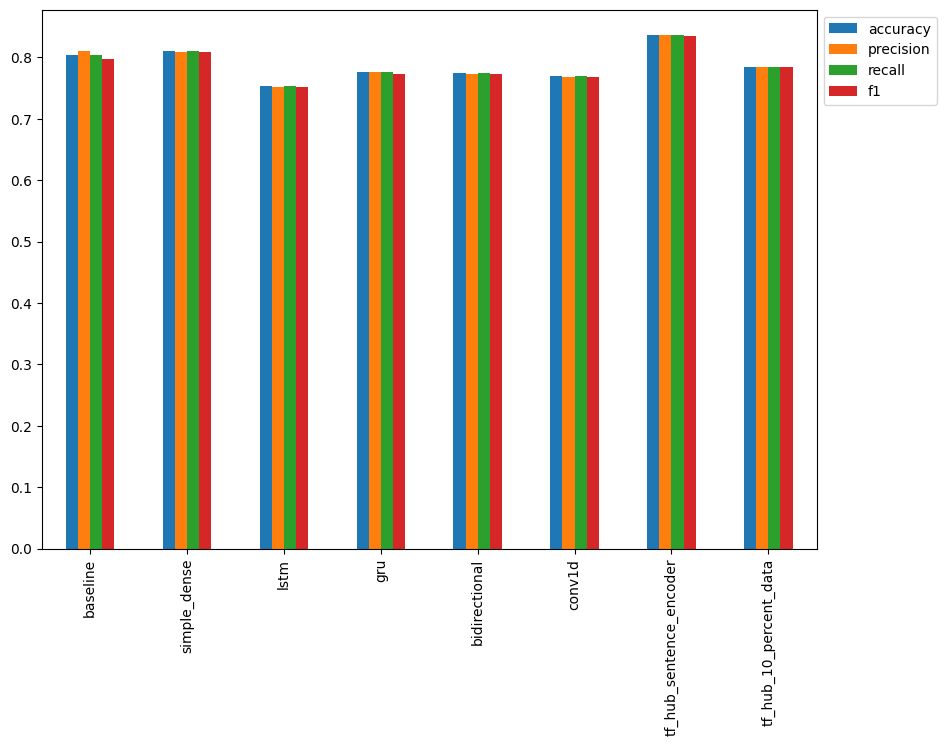

In [74]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

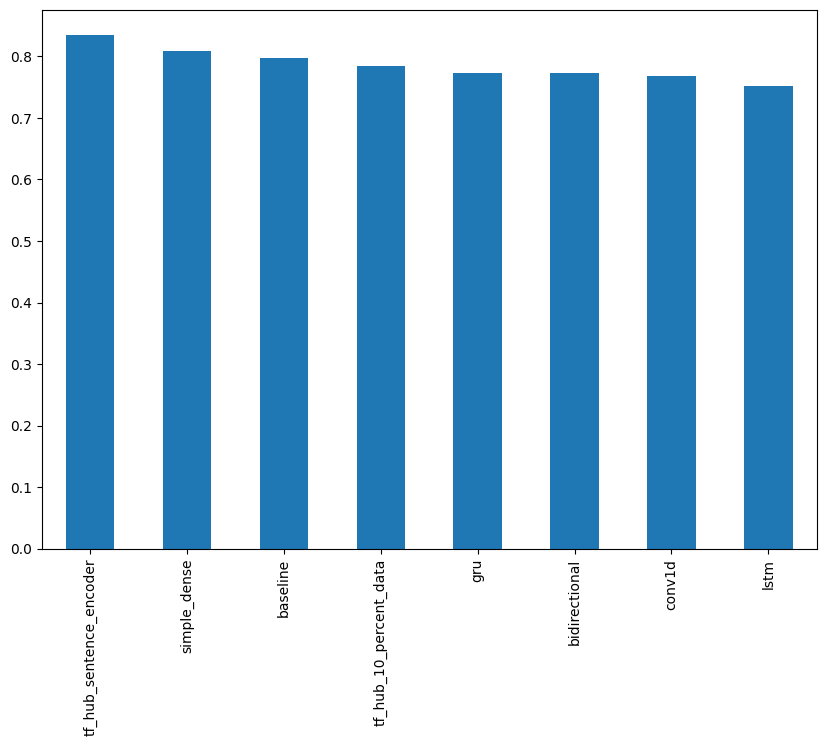

In [75]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));